In [1]:
import matplotlib.pyplot as plt
from joblib import load, dump
import pandas as pd
import numpy as np
import warnings, os
from glob import glob
import seaborn as sns
import scipy.stats as stats
import tensorflow as tf

import aggmap
from aggmap import loadmap

warnings.filterwarnings("ignore")
sns.set(style= 'white',font_scale = 1.2)

color = sns.color_palette("rainbow_r", 6) #PiYG
sns.palplot(color)

In [2]:
from config import P


In [3]:
results_save_folder = P.results_save_folder

if not os.path.exists(results_save_folder):
    os.makedirs(results_save_folder)

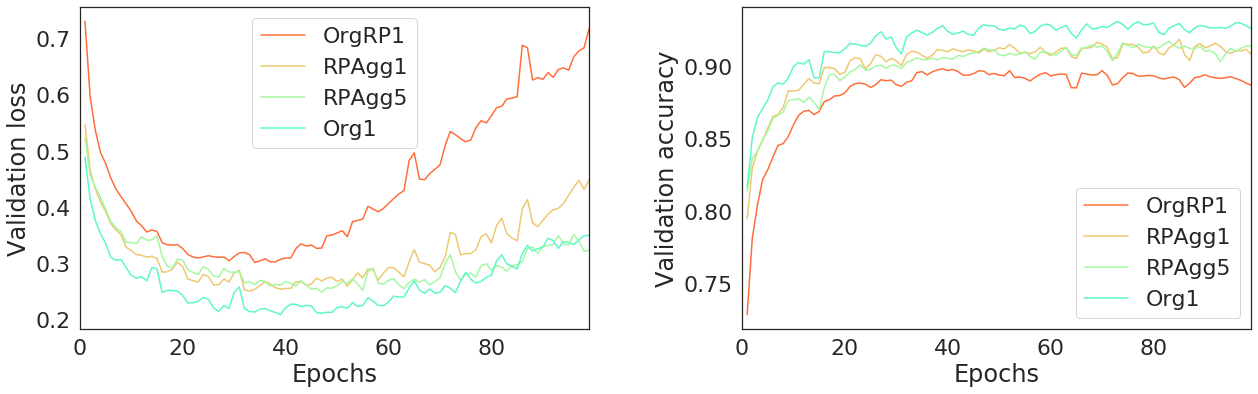

In [14]:
select = ['Org1',  'OrgRP1', 'RPAgg1',  'RPAgg5'] 

sns.set(style= 'white',font_scale = 2)

acc = []
loss =[]
for csv_file in glob(os.path.join(results_save_folder, 'training_*.csv')):
    tp = os.path.basename(csv_file).replace('training_','').replace('.csv','')
    df = pd.read_csv(csv_file, index_col=0)
    ts = df['val_accuracy']
    ls = df['val_loss']
    ts.name = tp
    ls.name = tp
    acc.append(ts)
    loss.append(ls)
    
    
df1 = pd.concat(acc, axis=1)#[select]
df2 = pd.concat(loss, axis=1)#[select]

df2 = df2[df2.mean().sort_values(ascending=False).index].rolling(2).mean()
df1 = df1[df2.columns].rolling(2).mean()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6), sharex=False, sharey=False, )

ax2, ax1 = axes
                       
df1.plot(lw = 1.5, color = color, ax = ax1,)
ax1.set_ylabel('Validation accuracy')
ax1.set_xlabel('Epochs')


df2.plot(lw = 1.5, color = color, ax=ax2)
ax2.set_ylabel('Validation loss')
ax2.set_xlabel('Epochs')


fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3)
plt.savefig(os.path.join(results_save_folder, 'performance_00_validation.png'), bbox_inches='tight', dpi=400)

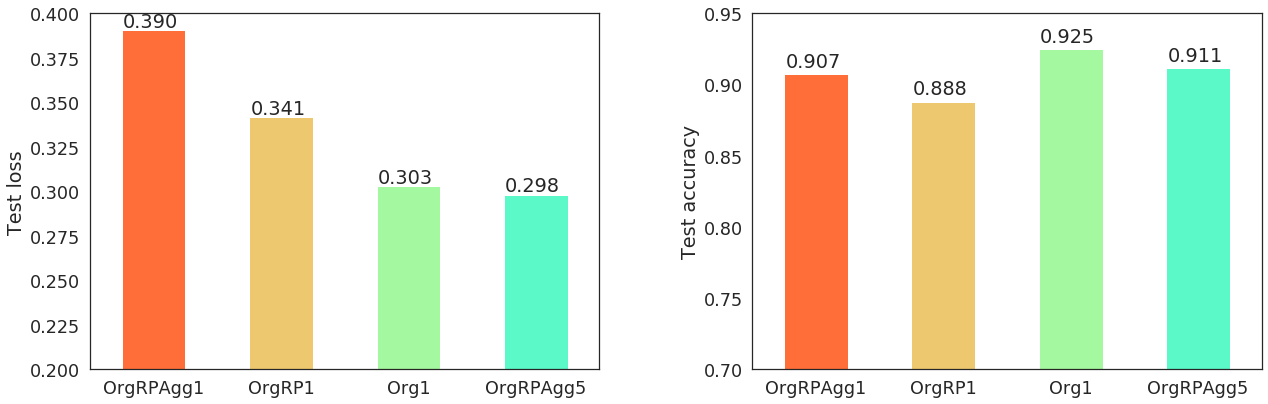

In [10]:
sns.set(style= 'white',font_scale = 1.6)

acc = []
loss = []
dfs = []
for csv_file in glob(os.path.join(results_save_folder, 'performance_Org*.csv')):
    tp = os.path.basename(csv_file).replace('performance_','').replace('.csv','')
    df = pd.read_csv(csv_file, index_col=0)
    ts = df['test_acc']
    ts.name = tp
    ls = df['test_loss']
    ts.name = tp
    ls.name = tp    

    acc.append(ts)
    loss.append(ls)
    dfs.append(df.T.rename(columns={0: tp}))
    

df1 = pd.concat(acc, axis=1)[select]
df2 = pd.concat(loss, axis=1)[select]


s2 = df2.T.sort_values(0, ascending = False)[0]
s1 = df1.T.loc[s2.index][0]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,6), sharex=False, sharey=False, )
ax2, ax1 = axes        

s1.plot(kind = 'bar',  color = color,ylim = (0.7, 0.95), ax = ax1) #
for x,y in enumerate(s1.values):
    ax1.annotate('%.3f' % y, xy = (x-0.24, y+0.005))
ax1.set_ylabel('Test accuracy')
ax1.set_xticklabels(labels = s1.index,rotation=0,) # ha = 'right'

s2.plot(kind = 'bar', color = color,  ylim = (0.2, 0.4), ax = ax2) #
for x,y in enumerate(s2.values):
    ax2.annotate('%.3f' % y, xy = (x-0.24, y+0.002))
ax2.set_ylabel('Test loss')
ax2.set_xticklabels(labels = s2.index,rotation=0,) # ha = 'right'

fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3)
plt.savefig(os.path.join(results_save_folder, 'performance_01_test.png'), bbox_inches='tight', dpi=400)

In [12]:
pd.concat(dfs, axis=1).T.to_excel(os.path.join(results_save_folder, 'performance_fmnist.xlsx'))